# Import Data from Kaggle

In [1]:
!pip install kaggle

In [2]:
from google.colab import files  #Import kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adicar","key":"d633bcba2a02f527f6b647e9a4aec952"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d moltean/fruits  #Download dataset

 99% 756M/760M [00:07<00:00, 142MB/s]
100% 760M/760M [00:07<00:00, 111MB/s]


In [5]:
!unzip fruits.zip -d my_data  #Unzip the dataset

Streaming output truncated to the last 5000 lines.
  inflating: my_data/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: my_data/fruits-360/Training/Tomato 3/126

# Modelling


> Setup libraries & imports






In [6]:
import cv2
import keras_preprocessing
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as implt

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_files
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Activation,MaxPooling2D,SpatialDropout2D,Flatten,Dropout
from tensorflow.keras.utils import to_categorical

# fix 'DirectoryIterator' object has no attribute 'shape'
from tensorflow.python.keras.utils.data_utils import Sequence
from keras.preprocessing.image import array_to_img, img_to_array, load_img



> Load test & training folder



In [7]:
test_path = "/content/my_data/fruits-360/Test"
train_path = "/content/my_data/fruits-360/Training"

img_height, img_width = 56, 56



> Image Processing



In [8]:
train_ImageGen = ImageDataGenerator(
    rescale = 1./255,
)

train_data = train_ImageGen.flow_from_directory(directory = train_path,
                                                      target_size = (100, 100),
                                                     batch_size = 64,
                                                        shuffle=True,
                                                       color_mode = 'rgb',
                                                     class_mode = 'categorical'
)

Found 67692 images belonging to 131 classes.


In [9]:
valid_datagen = ImageDataGenerator(rescale = 1./255)



test_data = valid_datagen.flow_from_directory(directory = test_path,
                                                 target_size = (100, 100),
                                               class_mode = 'categorical'
)

Found 22688 images belonging to 131 classes.




> Building Model



In [10]:
model = Sequential()
model.add(Conv2D(16, (3,3),input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(SpatialDropout2D(0.3))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(SpatialDropout2D(0.3))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(SpatialDropout2D(0.3))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(262))
model.add(Dropout(0.5))
model.add(Dense(131,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 16)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 98, 98, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0

In [11]:
early_stop = keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=4,
            verbose=1,
        )

history = model.fit(train_data, validation_data=test_data, shuffle=True, epochs=30, 
                    verbose=1, workers=3,callbacks = [early_stop])

Epoch 1/30
1058/1058 [==============================] - 81s 47ms/step - loss: 1.4042 - accuracy: 0.6446 - val_loss: 0.4305 - val_accuracy: 0.8830
Epoch 2/30
1058/1058 [==============================] - 49s 46ms/step - loss: 0.2888 - accuracy: 0.9127 - val_loss: 0.3501 - val_accuracy: 0.9144
Epoch 3/30
1058/1058 [==============================] - 50s 47ms/step - loss: 0.1745 - accuracy: 0.9483 - val_loss: 0.3464 - val_accuracy: 0.9204
Epoch 4/30
1058/1058 [==============================] - 50s 47ms/step - loss: 0.1342 - accuracy: 0.9584 - val_loss: 0.3524 - val_accuracy: 0.9286
Epoch 5/30
1058/1058 [==============================] - 50s 47ms/step - loss: 0.1235 - accuracy: 0.9628 - val_loss: 0.3038 - val_accuracy: 0.9376
Epoch 6/30
1058/1058 [==============================] - 50s 47ms/step - loss: 0.1068 - accuracy: 0.9679 - val_loss: 0.2699 - val_accuracy: 0.9398
Epoch 7/30
1058/1058 [==============================] - 50s 48ms/step - loss: 0.0961 - accuracy: 0.9705 - val_loss: 0.3387 -



> Accuracy



In [12]:
score = model.evaluate_generator (test_data,verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.33575233817100525
Test accuracy: 0.9466678500175476


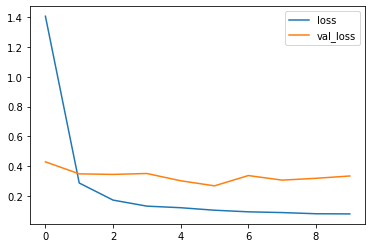

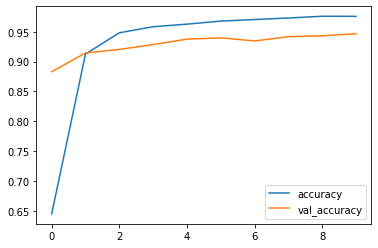

In [14]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

# Save the model



> Save the model (.pb)



In [17]:
import tensorflow as tf
fruitmodel = "/content/drive/MyDrive/Project/Fruit/Savedmodel/SavedmodelFruit1"
tf.saved_model.save(model, fruitmodel)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Fruit/Savedmodel/SavedmodelFruit1/assets




> Convert Model from saved model to Tflite



In [18]:
converter = tf.lite.TFLiteConverter.from_saved_model(fruitmodel) # path to the SavedModel directory
tflite_model = converter.convert()



> Save Tflite model (.tflite)



In [19]:
with open('/content/drive/MyDrive/Project/Fruit/tflitefruit/modelFruit13.tflite', 'wb') as f:
  f.write(tflite_model)

# Predicting images



> Image preprocess



In [20]:
from PIL import Image
from keras.preprocessing import image

In [21]:
#preprocess file
def prepare_img(path):
    img = image.load_img(path,target_size=(100,100))
    img_arr = image.img_to_array(img)
    img_arr_expnd  = np.expand_dims(img_arr,axis=0)
    img = keras.applications.mobilenet_v2.preprocess_input(img_arr_expnd)
    
    return img

In [22]:
labels = list(test_data.class_indices.keys())



> Prediction 1



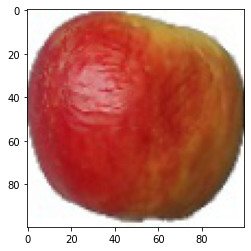

In [38]:
testImg1 = plt.imshow(Image.open('/content/my_data/fruits-360/Test/Apple Red Yellow 1/32_100.jpg'));

In [44]:
prep_img1 = prepare_img('/content/my_data/fruits-360/Test/Apple Red Yellow 1/32_100.jpg')
pred1 = model.predict(prep_img1)
labels[np.argmax(pred1)]

'Apple Red Yellow 1'



> Prediction 2



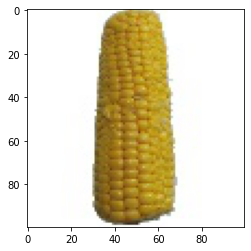

In [45]:
testImg2 = plt.imshow(Image.open('/content/my_data/fruits-360/Test/Corn/171_100.jpg'));

In [46]:
prep_img2 = prepare_img('/content/my_data/fruits-360/Test/Corn/171_100.jpg')
pred2 = model.predict(prep_img2)
labels[np.argmax(pred2)]

'Corn'